In [1]:
%load_ext lab_black

In [2]:
import intake
import rioxarray
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import os

In [3]:
os.environ["AWS_NO_SIGN_REQUEST"] = "true"

In [4]:
cat = intake.open_catalog("../example/catalog.yml")
# cat = intake.open_catalog(
#    "https://raw.githubusercontent.com/leifdenby/eurec4a-intake-coral-lidar-setup/master/catalog.yml"
# )
# cat.coral_highres  # .to_dask()

In [5]:
cat.goesrgb

goesrgb:
  args:
    chunks:
      band: 1
      x: 100
      y: 100
    concat_dim: time
    engine: rioxarray
    urlpath: /home/leifdenby/git-repos/goes-truecolor-intake/notebooks/../example//{time:%Y%m%dT%H%M%SZ}.tif
  description: Truecolor RGB of GOES-16
  driver: intake_xarray.raster.RasterIOSource
  metadata:
    catalog_dir: /home/leifdenby/git-repos/goes-truecolor-intake/notebooks/../example/


In [6]:
cat.goesrgb.__class__

intake_xarray.raster.RasterIOSource

In [7]:
da_goesrgb = cat.goesrgb.to_dask()
da_goesrgb

,Array,Chunk
Bytes,24.74 MiB,9.77 kiB
Shape,"(3, 4, 1066, 2028)","(1, 1, 100, 100)"
Count,10 Graph Layers,2772 Chunks
Type,uint8,numpy.ndarray


In [8]:
%debug

ERROR:root:No traceback has been produced, nothing to debug.


In [9]:
da_goesrgb.attrs.pop("nodatavals", None)

(nan, nan, nan, nan)

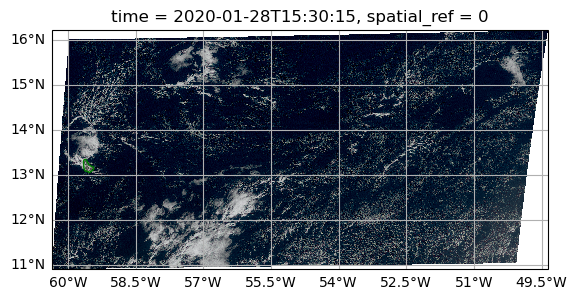

In [10]:
fig, ax = plt.subplots(subplot_kw=dict(projection=ccrs.PlateCarree()))
da_goesrgb_scene = da_goesrgb.sel(
    time="2020-01-01T14:00", method="nearest"
).rio.reproject(ccrs.PlateCarree())
da_goesrgb_scene.plot.imshow(ax=ax, rgb="band")
ax.gridlines(draw_labels=["left", "bottom"])
ax.coastlines(resolution="10m", color="green")